<a href="https://colab.research.google.com/github/chhaewxn/huggingface_lab/blob/main/Hugging%20Face%20Week1%20Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face Transformers 실습하며 배우기 🤗

작성자: Hugging Face KREW, [김하림](https://github.com/harheem)

1주차부터 4주차까지 쉽게 허깅페이스를 배울 수 있도록 속성만 뽑아 실습형 문제를 준비해보았습니다.
끝까지 함께 해주세요!

### #문제 001

첫 번째 문제인 만큼 가벼운 마음으로 시작해 보아요.

구글 코랩에서 Hugging Face Transformers 라이브러리를 설치한 후, Tansformers 라이브러리 버전을 출력해 보세요!

💡 HINT

1. 라이브러리를 설치하는 방법: `pip` 명령어를 사용합니다.

   `!pip install [라이브러리]`
2. 라이브러리 버전을 출력하는 방법: 설치한 라이브러리를 `import` 한 후, `__version__` 속성을 사용합니다.

   ```
   import [라이브러리]
   print([라이브러리].__version__)
   ```

In [1]:
# Transformer 라이브러리 설치
!pip install transformers

In [3]:
# 설치 후에 라이브러리 import
import transformers

print(transformers.__version__)

4.42.4


### #문제 002

1번 문제는 너무 쉬우셨죠? 이번엔 조금 난이도를 높여볼게요.

🤗 Transformers 라이브러리 파이프라인을 사용하면 감성 분석을 쉽게 할 수 있어요. 다음 나열된 문장들이 모델을 이용하여 긍정인지 부정인지 판단해보세요.

- "**I am pleased to be able to join the Hugging Face OSS project.**"
   - 저는 Hugging Face OSS 프로젝트에 함께 할 수 있게 되어 기뻐요.
- "**We strongly oppose the measures announced by the government regarding restrictions on overseas direct purchases.**"
   - 우리는 정부에서 발표한 해외 직구 규제 대책에 대해 강력히 반대합니다.

** 감성 분석: 텍스트에 들어있는 의견이나 감성, 평가, 태도 등의 주관적인 정보를 컴퓨터를 통해 분석하는 과정입니다.


💡 HINT

1. 🤗 Transformers 라이브러리 pipeline 형식에 맞춰 `sentiment-analysis`를 입력하여 모델 불러오기
2. 불러온 모델에 감성 분석을 실행할 문장을 입력하기


> 못 풀겠어도 걱정하지 마세요. [이 문서](https://wikidocs.net/166787)에서 답을 찾을 수 있어요 👀

In [4]:
# 필요한 라이브러리를 불러옵니다.
from transformers import pipeline

In [5]:
# 감성 분석 모델을 불러와보세요.
sentiment = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
# 모델을 출력해봅시다.
sentiment.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [10]:
# 감성 분석을 수행해보세요.
sentences = [
    "I am pleased to be able to join the Hugging Face OSS project.",
    "We strongly oppose the measures announced by the government regarding restrictions on overseas direct purchases."
]

for sentence in sentences:
  result = sentiment(sentence)
  print(f"문장: {sentence}")
  print(f"감성: {result[0]['label']}, 확률: {result[0]['score']:.4f}")
  print()

문장: I am pleased to be able to join the Hugging Face OSS project.
감성: POSITIVE, 확률: 0.9997

문장: We strongly oppose the measures announced by the government regarding restrictions on overseas direct purchases.
감성: NEGATIVE, 확률: 0.6352



### #문제 003

다들 잘 따라오셨나요? 1주차 마지막 문제입니다.
🤗 Transformers 라이브러리에서 question-answering 파이프라인을 불러온 후 질의 응답을 할 것입니다.

2023년에 위키피디아에서 가장 많이 검색된 항목은 오픈AI가 개발한 ChatGPT라고 합니다. 이 영문 문서에 있는 GPT-4, GPT Store에 대한 내용을 컨텍스트(context)로 주고, 질의 응답을 해보세요!

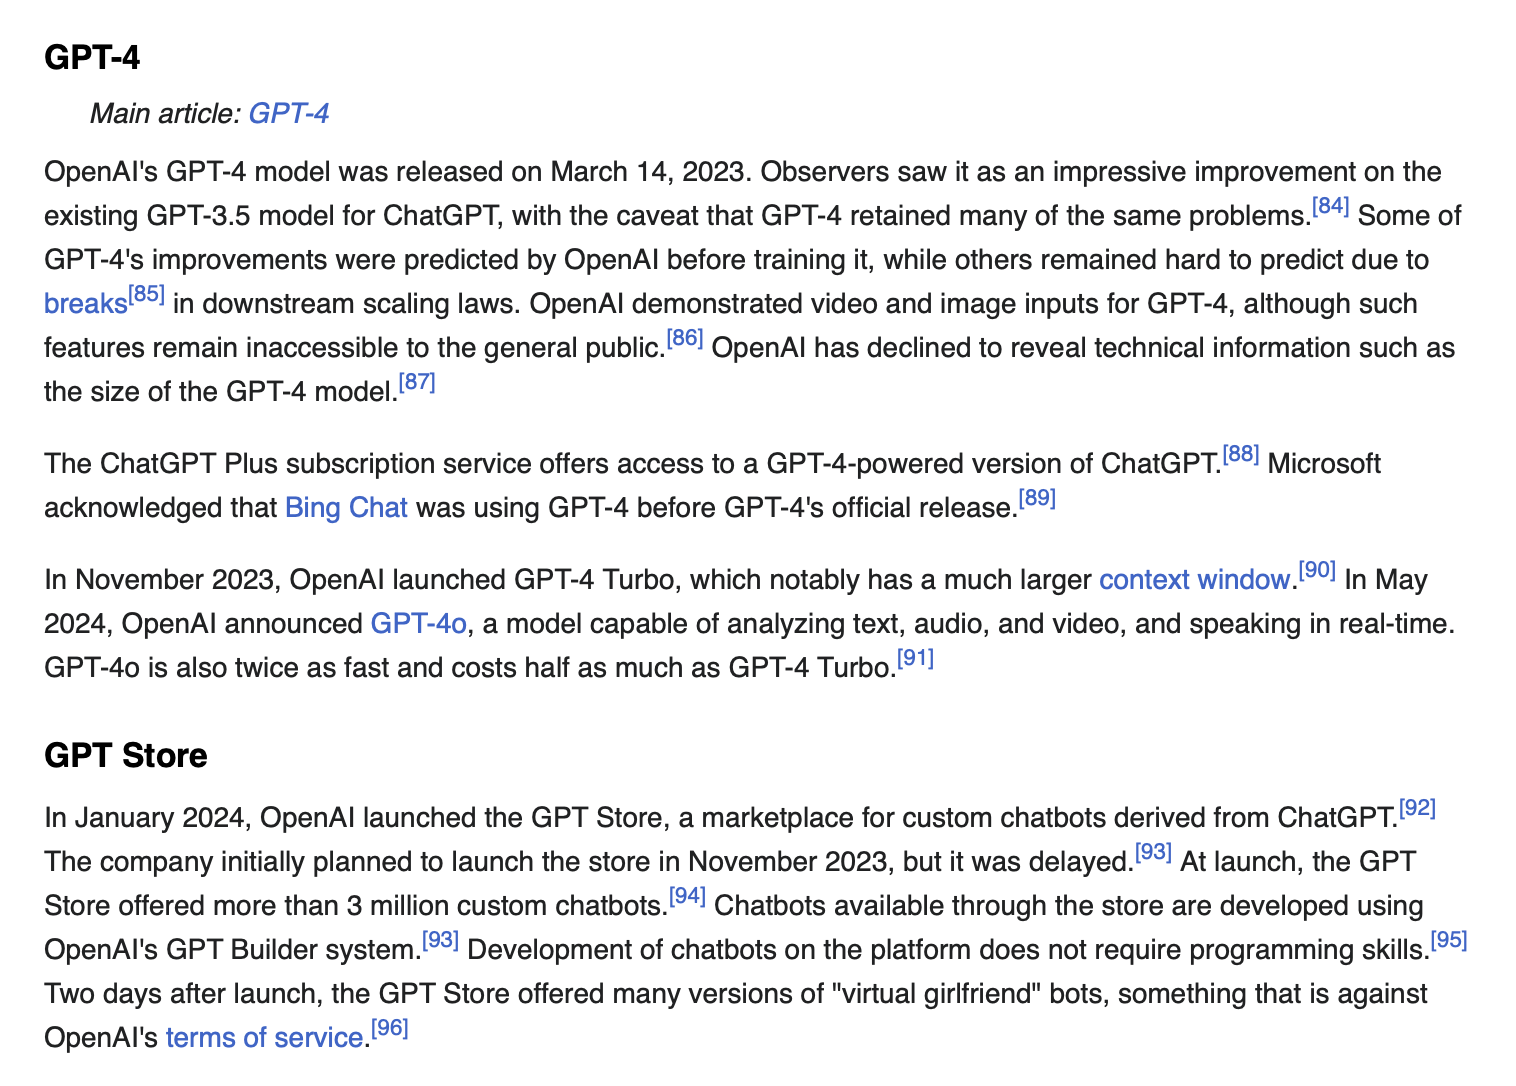


💡 HINT


1. 🤗 Transformers 라이브러리 pipeline 형식에 맞춰 `question-answering`를 입력하여 모델 불러오기
2. 불러온 모델에 질의 응답할 컨텍스트와 질문을 입력하기

| 못 풀겠어도 걱정하지 마세요. 이번에도 [이 문서](https://wikidocs.net/166787)에서 답을 찾을 수 있어요 👀

In [11]:
# 필요한 라이브러리를 불러옵니다
from transformers import pipeline

In [12]:
# 질의 응답 모델을 불러와보세요.
qa = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [13]:
# 컨텍스트를 입력해보세요. 여러 줄로 이루어진 문장을 인용할 경우 """를 사용한답니다.
chatgpt_wiki_text = """
OpenAI's GPT-4 model was released on March 14, 2023. Observers saw it as an impressive improvement on the existing GPT-3.5 model for ChatGPT, with the caveat that GPT-4 retained many of the same problems. Some of GPT-4's improvements were predicted by OpenAI before training it, while others remained hard to predict due to breaks in downstream scaling laws. OpenAI demonstrated video and image inputs for GPT-4, although such features remain inaccessible to the general public. OpenAI has declined to reveal technical information such as the size of the GPT-4 model.

The ChatGPT Plus subscription service offers access to a GPT-4-powered version of ChatGPT. Microsoft acknowledged that Bing Chat was using GPT-4 before GPT-4's official release.

In November 2023, OpenAI launched GPT-4 Turbo, which notably has a much larger context window. In May 2024, OpenAI announced GPT-4o, a model capable of analyzing text, audio, and video, and speaking in real-time. GPT-4o is also twice as fast and costs half as much as GPT-4 Turbo.

In January 2024, OpenAI launched the GPT Store, a marketplace for custom chatbots derived from ChatGPT. The company initially planned to launch the store in November 2023, but it was delayed. At launch, the GPT Store offered more than 3 million custom chatbots. Chatbots available through the store are developed using OpenAI's GPT Builder system. Development of chatbots on the platform does not require programming skills. Two days after launch, the GPT Store offered many versions of "virtual girlfriend" bots, something that is against OpenAI's terms of service.
"""

In [14]:
# 모델을 출력해봅시다.
qa.model

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
      

In [15]:
# 컨텍스트를 바탕으로 질문 생성
questions = [
    "When was GPT-4 released?",
    "What new features were demonstrated for GPT-4?",
    "What is GPT-4 Turbo?",
    "What is GPT-4o capable of?",
    "When was the GPT Store launched and how many chatbots did it offer at launch?"
]

In [19]:
# 각 질문에 대한 답변 출력
for question in questions:
  result = qa(question=question, context=chatgpt_wiki_text)
  print(f"질문: {question}")
  print(f"답변: {result['answer']}")
  print(f"확신도: {result['score']:.4f}")
  print()

질문: When was GPT-4 released?
답변: March 14, 2023
확신도: 0.9536

질문: What new features were demonstrated for GPT-4?
답변: video and image inputs
확신도: 0.9029

질문: What is GPT-4 Turbo?
답변: twice as fast
확신도: 0.5316

질문: What is GPT-4o capable of?
답변: analyzing text, audio, and video, and speaking in real-time
확신도: 0.7516

질문: When was the GPT Store launched and how many chatbots did it offer at launch?
답변: more than 3 million
확신도: 0.6451

